Climate analysis

- The datase set shows that Hawaii is a place where rain is normal, in the plot of the last year rain is observable that
  almost all days have rain, beautiful place.
    
- Also, the dataset shows that the temperature is very nice in that place, in the histogram is possible to see that for
  most of the days, the temperature is between 70 and 80 f.
    
- Haweii, very beautiful place.    


In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [30]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [31]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [34]:
# performing an inpect to Measurement table
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns("Measurement")
for c in columns:
    print(c["name"], c["type"])
    


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [35]:
# performing an inpect to Station table

inspector = inspect(engine)
columns = inspector.get_columns("Station")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [36]:
# Find the most recent date in the data set.
# the table that contains a date column is the Measurement table
recent_date = session.query(func.max(Measurement.date)).first()
print(recent_date)



('2017-08-23',)


In [37]:
#breaking recent date in variables year, month and day
recent_date_br=str(recent_date)

year = int(recent_date_br[2]+ recent_date_br[3]+ recent_date_br[4]+ recent_date_br[5])
print(year)

month = int(recent_date_br[7]+ recent_date_br[8])
print(month)

day = int(recent_date_br[10]+ recent_date_br[11])
print(day)

2017
8
23


In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
date_one_year_before = dt.date(year, month, day) - dt.timedelta(days=365)
print(date_one_year_before)


2016-08-23


In [39]:
# Perform a query to retrieve the data and precipitation scores
precip= session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > '2016-08-23').order_by(Measurement.date.desc()).all()
#precip

In [40]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipdf=pd.DataFrame(precip,columns=['date','prcp'])
precipdf=precipdf.set_index('date')
precipdf

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [41]:
# Sort the dataframe by date
precipdf_sorted=precipdf.sort_values('date')
precipdf_sorted

,prcp
date,
2016-08-24,1.45
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.15
2016-08-24,NaN
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


Text(0.5, 1.0, 'Precipitation in period from 2016/8/24 to 2017/8/23')

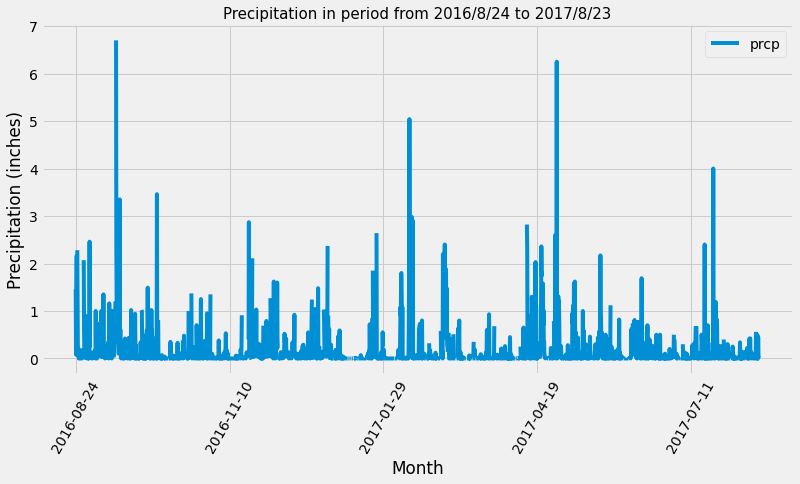

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data

precipdf_sorted.plot(rot=60, figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation in period from 2016/8/24 to 2017/8/23", fontsize=15)

In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_stats = precipdf["prcp"].describe()
print(precip_stats)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number stations in the dataset

#session.query(Station.station).group_by(Station.station).all()
session.query(func.count(Station.station)).all()

[(9)]

In [45]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == ('USC00519281')).all()


[(54.0, 85.0, 71.66378066378067)]

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_months = session.query(Measurement.tobs)\
    .filter(Measurement.station == ('USC00519281'))\
    .filter(Measurement.date > '2016-08-23').all()

#last_months

# Save the query results as a Pandas DataFrame and set the index to the date column
last_monthsdf=pd.DataFrame(last_months,columns=['tobs'])
last_monthsdf.head(10)


,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
5,78.0
6,77.0
7,78.0
8,80.0
9,80.0


Text(0.5, 8.73999999999998, 'Temperature')

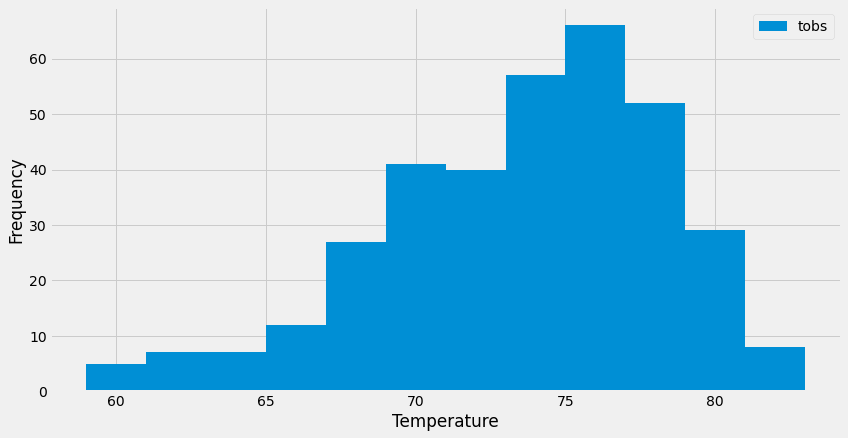

In [48]:
#plot the results as a histogram

last_months_tobs = last_monthsdf.plot.hist(bins=12, figsize=(12, 6))
plt.tight_layout()
plt.xlabel("Temperature")


# Close session

In [49]:
# Close Session
session.close()